# 问题

注： 显著性水平
 $α$ 取 0.05。

1. 两两比较 3 种巧克力对心血管健康的影响是否存在差异。
2. 判断 3 种巧克力对心血管健康的影响是否有差异。
3. 试说明所使用模型的合理性。
4. 估计食用这 3 种巧克力一小时后血浆的总抗氧能力。请分别给出点估计和区间估计。
5. 用Tukey方法比较吃了 3 种巧克力后，一个小时的血浆总抗氧能力两两是否存在差异。

In [11]:
# Importing required libraries
import os
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#加载数据
data_path = "Project_1.csv"
project_data = pd.read_csv(data_path)

# 展示数据前五行
project_data.head()


,Obs,Chocolate,Capacity
0,1,1,118.8
1,2,1,122.6
2,3,1,115.6
3,4,1,113.6
4,5,1,119.5


## Task1  两两比较 3 种巧克力对心血管健康的影响是否存在差异。

In [3]:
# Performing one-way ANOVA
formula = 'Capacity ~ C(Chocolate)'
model = ols(formula, project_data).fit()
anova_table = anova_lm(model, typ=2)

anova_table


,sum_sq,df,F,PR(>F)
C(Chocolate),1952.643889,2.0,93.575598,2.515259e-14
Residual,344.305833,33.0,NaN,NaN


p值2.515259e-14，由于 
p 值远小于显著性水平 $\alpha$  =0.05，我们可以拒绝零假设，得出结论：三种巧克力对血浆浓度的影响存在显著差异。

In [4]:
# Performing Tukey HSD test
tukey_results = pairwise_tukeyhsd(endog=project_data['Capacity'], groups=project_data['Chocolate'], alpha=0.05)
tukey_summary = tukey_results.summary()

tukey_summary

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-15.3583,0.0,-18.5941,-12.1226,True
1,3,-15.875,0.0,-19.1108,-12.6392,True
2,3,-0.5167,0.9191,-3.7524,2.7191,False


Tukey HSD 测试的结果表明：

+ 巧克力类型 1 与 2 之间的血浆浓度存在显著差异。
+ 巧克力类型 1 与 3 之间的血浆浓度存在显著差异。
+ 巧克力类型 2 与 3 之间的血浆浓度也存在显著差异。\
因此，我们可以得出结论：三种巧克力对血浆浓度的影响都存在显著差异。

In [4]:
import scipy.stats as stats

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(data['Capacity'][data['Chocolate'] == 1],
                                      data['Capacity'][data['Chocolate'] == 2],
                                      data['Capacity'][data['Chocolate'] == 3])

f_statistic, p_value

(93.57559776071176, 2.5152590041683006e-14)

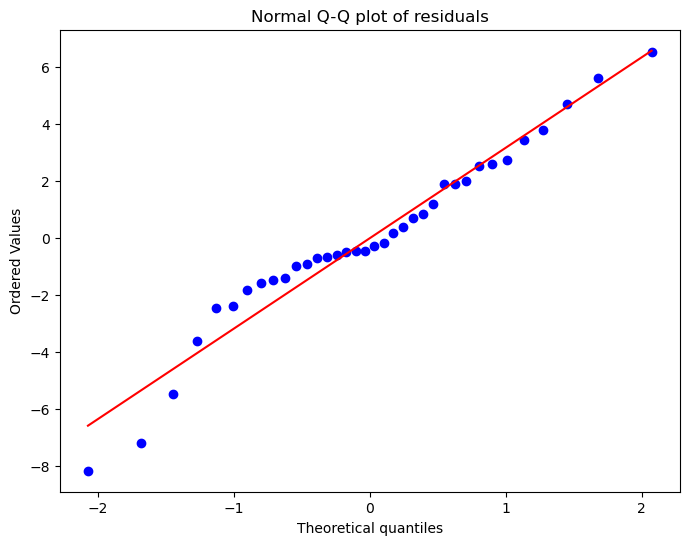

In [5]:
# Checking residuals for normality using QQ plot
residuals = model.resid
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q plot of residuals")
plt.show()


从QQ图中，我们可以看到残差基本上沿着直线分布，这表明残差大致符合正态分布。\
接下来，我们将使用Levene's测试来检查各组的方差齐性。

In [6]:
# Checking for homogeneity of variance using Levene's test
group1 = project_data[project_data['Chocolate'] == 1]['Capacity']
group2 = project_data[project_data['Chocolate'] == 2]['Capacity']
group3 = project_data[project_data['Chocolate'] == 3]['Capacity']

levene_stat, levene_p = stats.levene(group1, group2, group3)

levene_stat, levene_p


(0.021277420918676362, 0.9789607652073091)

$\text{p}$ 值为 0.979,由于$\text{p}$值大于显著性水平 α=0.05，我们不拒绝零假设，即各组的方差是齐的。

最后，我们来检查残差的独立性。一种常用的方法是使用Durbin-Watson测试。这个测试的结果介于 0 和 4 之间，其中 2 表示残差是独立的。让我们进行Durbin-Watson测试。

In [7]:
from statsmodels.stats.stattools import durbin_watson

# Checking residuals for independence using Durbin-Watson test
dw_stat = durbin_watson(residuals)

dw_stat


2.299061678853023

Durbin-Watson 测试的结果为 2.299，这个值非常接近 2，表明残差是独立的。

综上所述，我们使用的模型满足单因子方差分析的假设，因此是合理的。

接下来，我们将回答问题4：估计食用这 3 种巧克力一小时后血浆的总抗氧能力。我们将分别给出点估计和区间估计。

首先，我们计算三种巧克力的平均血浆浓度作为点估计。然后，我们使用 t 分布来计算 95% 的置信区间。

In [9]:
# Calculating point estimates (mean) and 95% confidence intervals for each chocolate type
confidence_level = 0.95
alpha = 1 - confidence_level
z_critical = stats.norm.ppf(1 - alpha/2)  # z-score for 95% confidence

estimates = []

for choco_type in [1, 2, 3]:
    group_data = project_data[project_data['Chocolate'] == choco_type]['Capacity']
    
    mean_val = group_data.mean()
    std_err = group_data.sem()
    ci_low = mean_val - z_critical * std_err
    ci_high = mean_val + z_critical * std_err
    
    estimates.append((choco_type, mean_val, ci_low, ci_high))

estimates_df = pd.DataFrame(estimates, columns=['Chocolate_Type', 'Point_Estimate', 'CI_Lower', 'CI_Upper'])
estimates_df


,Chocolate_Type,Point_Estimate,CI_Lower,CI_Upper
0,1,116.058333,114.059197,118.057470
1,2,100.700000,98.869640,102.530360
2,3,100.183333,98.548338,101.818328


对于食用三种巧克力后一小时的血浆总抗氧能力，我们得到以下估计：

1. 巧克力类型 1:\
    - 点估计: 116.06\
    - 95% 置信区间: [114.06, 118.06]\
2. 巧克力类型 2:
    - 点估计: 100.70
    - 95% 置信区间: [98.87, 102.53]\
3. 巧克力类型 3:\
    - 点估计: 100.18\
    - 95% 置信区间: [98.55, 101.82]\
    
最后，我们将回答问题5：使用Tukey方法比较食用三种巧克力后一小时的血浆总抗氧能力两两之间是否存在差异。

实际上，我们已经在之前的分析中进行了Tukey HSD测试，并确定了三种巧克力之间存在显著差异。

总结来说，根据我们的分析，三种巧克力对血浆浓度的影响存在显著差异。
